## #01 - Passos iniciais

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Dataset 1: Lichess
## Possui informações sobre mais de 20 mil partidas de xadrez no site lichess.com

lichess = pd.read_csv('./datasets/Chess Game Dataset (Lichess)/games.csv')
lichess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
## Dataset 2: FIDE 2022
## Possui informações sobre todos os jogadores registrados na Federação Internacional de Xadrez (FIDE)

data = pd.read_csv('./datasets/International Chess Statistics 2022/Complete_Players_Database.csv')
data.head()

C:\Users\PC\AppData\Local\Temp/ipykernel_15432/644587684.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./datasets/International Chess Statistics 2022/Complete_Players_Database.csv')


,Country Rank,Name,Title,Country,FIDE,Age,K-factor
0,1,"Mirzaad, S.wahabuddin",FM,Afghanistan,1999.0,35,20
1,2,"Rahmani, Asef",unranked/unrated,Afghanistan,1871.0,49,20
2,3,"Sarwari, Hamidullah",unranked/unrated,Afghanistan,1866.0,33,20
3,4,"Sakhawaty, Sepehr",unranked/unrated,Afghanistan,1846.0,19,20
4,5,"Jamshedy, Mohammad Ismail",unranked/unrated,Afghanistan,1790.0,78,20


### Limpeza prévia de alguns dados

In [4]:
## A coluna FIDE, que deveria abrigar apenas o valor do rating dos jogadores, possui linhas com informações não numéricas
## Isso dificulta o processo de ordenação dos jogadores por rating

## Algumas linhas possuem números em formato string
## Outras linhas contém 'unranked/unrated'

## Esses jogadores sem rating não nos interessam para esta análise

fide = []

## Vamos criar uma máscara booleana para filtrar o DataFrame e manter apenas as linhas sem 'unranked/unrated'

for i in data['FIDE']:
    if i != 'unranked/unrated':
        fide.append(True)
    else:
        fide.append(False)

In [5]:
## Utilizando a máscara booleana
data = data[fide]

In [6]:
## Os valores restantes são números, mas nem todos são do tipo float
## Alguns são do tipo string e precisam ser convertidos

fide = []

for i in data['FIDE']:
    fide.append(float(i))

In [7]:
## A coluna FIDE possui apenas valores numéricos 

data['FIDE'] = fide

## #02 - Exploração inicial

### Medidas de centralidade e dispersão

#### Dataset 1: Lichess

In [8]:
## Usaremos apenas estas três colunas

lichess[['turns', 'white_rating', 'black_rating']].describe()

,turns,white_rating,black_rating
count,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987
std,33.570585,291.253376,291.036126
min,1.000000,784.000000,789.000000
25%,37.000000,1398.000000,1391.000000
50%,55.000000,1567.000000,1562.000000
75%,79.000000,1793.000000,1784.000000
max,349.000000,2700.000000,2723.000000


#### Dataset 2: FIDE 2022

In [9]:
data.describe()

## Jogador de 970 anos?

,Country Rank,FIDE,Age,K-factor
count,158685.000000,158685.000000,158685.000000,158685.000000
mean,2683.619536,1617.732740,35.813486,29.756026
std,3211.374230,359.149506,20.492701,10.352908
min,1.000000,1001.000000,6.000000,10.000000
25%,422.000000,1322.000000,18.000000,20.000000
50%,1411.000000,1612.000000,30.000000,20.000000
75%,3538.000000,1890.000000,53.000000,40.000000
max,14363.000000,2864.100000,970.000000,40.000000


### Boxplots

#### Dataset 1: Lichess

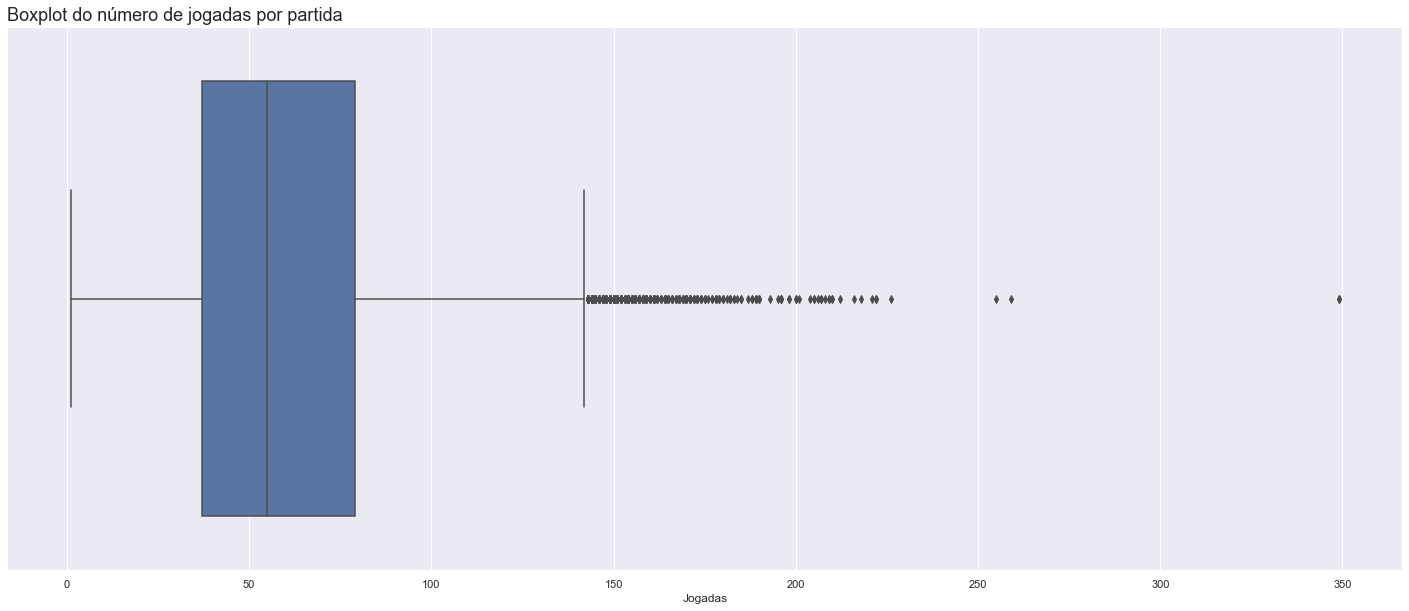

In [10]:
ax = sns.boxplot(data=lichess, x = 'turns')
ax.set_title('Boxplot do número de jogadas por partida', loc='left', fontsize=18)
ax.set_xlabel('Jogadas')
ax.figure.set_size_inches(25,10)

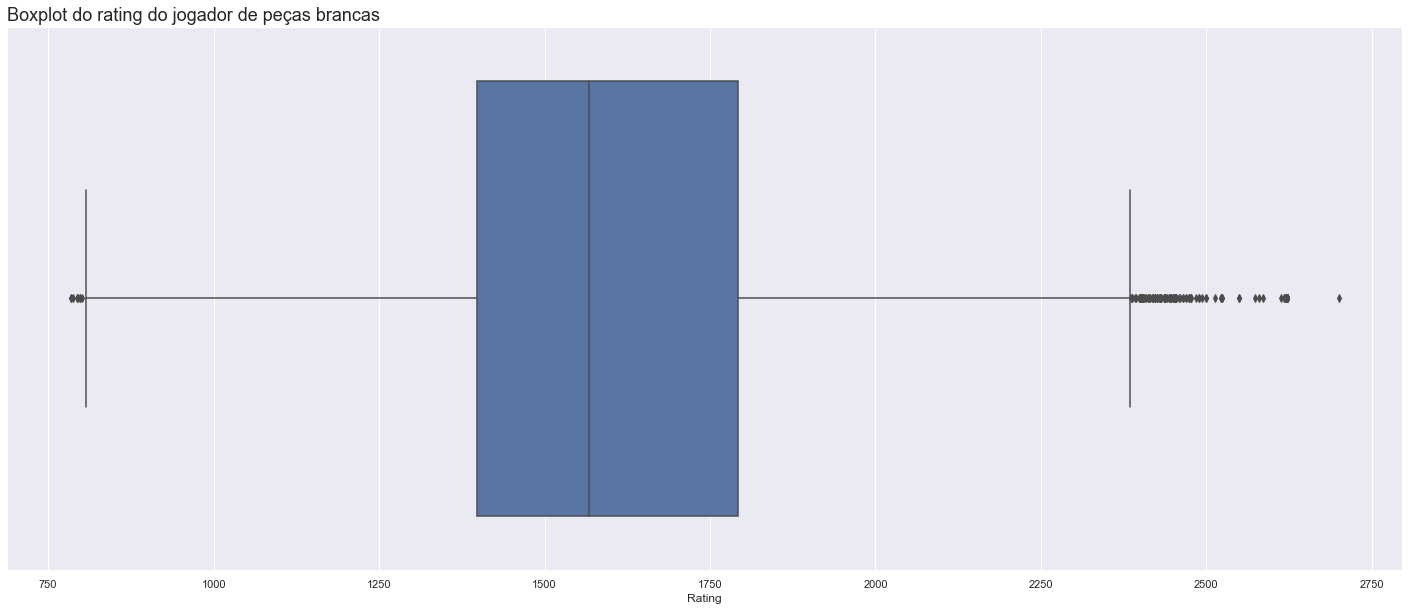

In [11]:
ax = sns.boxplot(data=lichess, x = 'white_rating')
ax.set_title('Boxplot do rating do jogador de peças brancas', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)

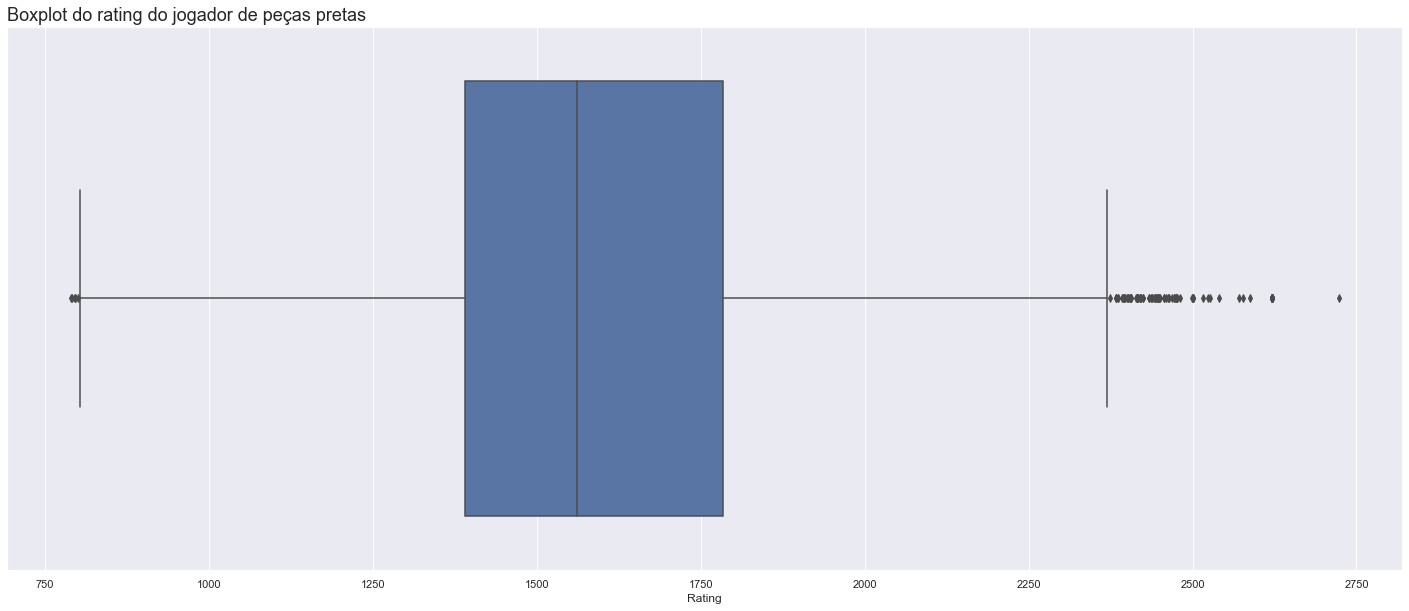

In [12]:
ax = sns.boxplot(data=lichess, x = 'black_rating')
ax.set_title('Boxplot do rating do jogador de peças pretas', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)

#### Dataset 2: FIDE 2022

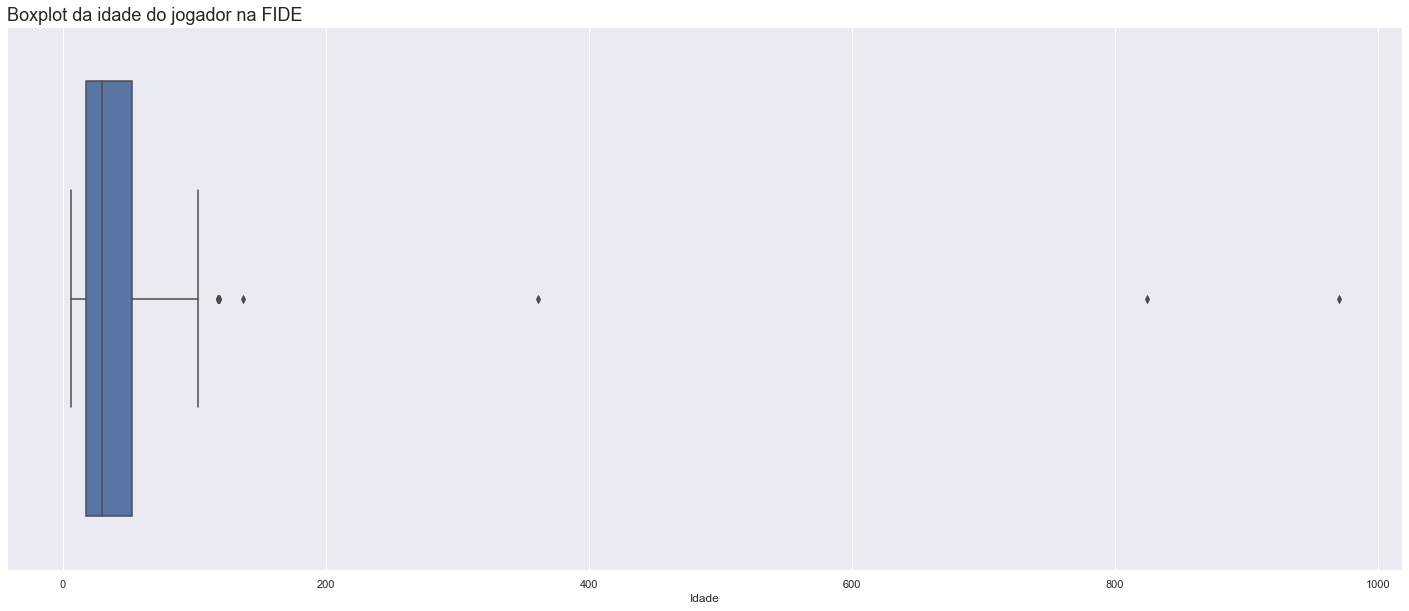

In [21]:
ax = sns.boxplot(data=data, x='Age')
ax.set_title('Boxplot da idade do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Idade')
ax.figure.set_size_inches(25,10)

## O boxplot parece muito achatado
## Isso se deve aos outliers com idades muito elevadas, acima dos 100 anos

In [23]:
## Vamos resolver o problema das idades muito elevadas
## Qual é a idade do jogador de xadrez mais velho em atividade?

## 100 anos!  https://www.chess.com/pt-BR/news/view/yuri-averbakh-100-anos

## Vamos utilizar apenas os jogadores com idades abaixo dos 100 anos

data = data[data['Age'] < 100]

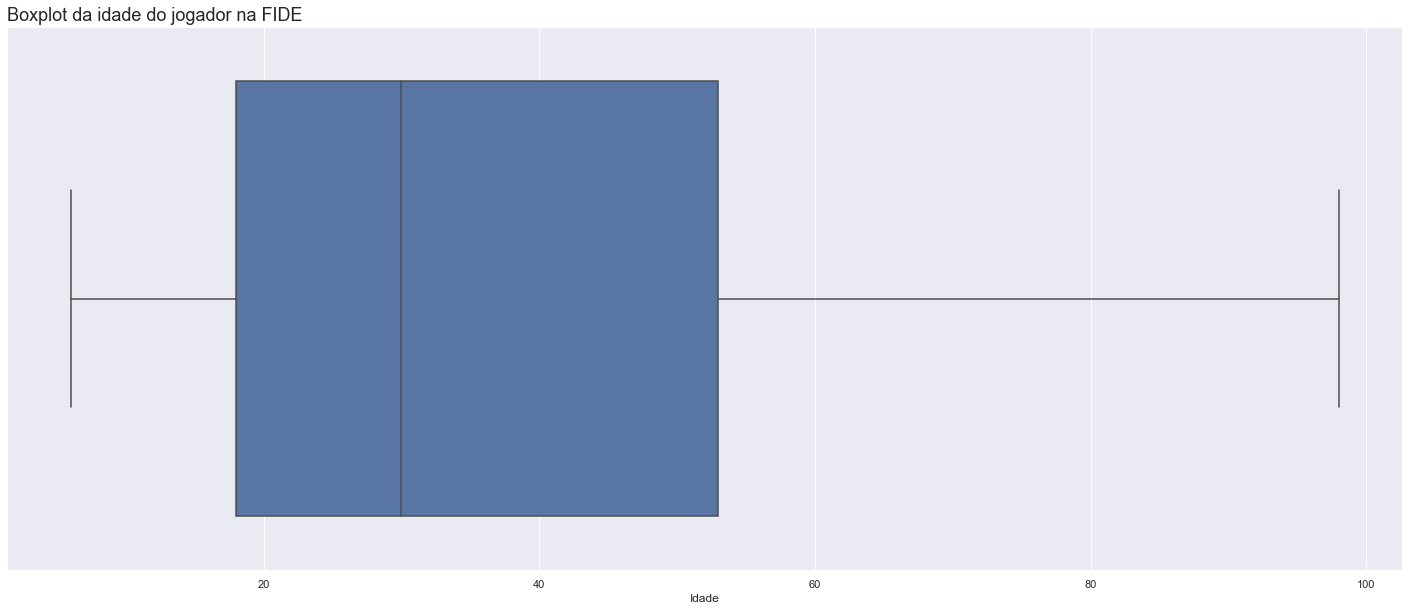

In [24]:
## Façamos novamente o boxplot das idades dos jogadores

ax = sns.boxplot(data=data, x='Age')
ax.set_title('Boxplot da idade do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Idade')
ax.figure.set_size_inches(25,10)

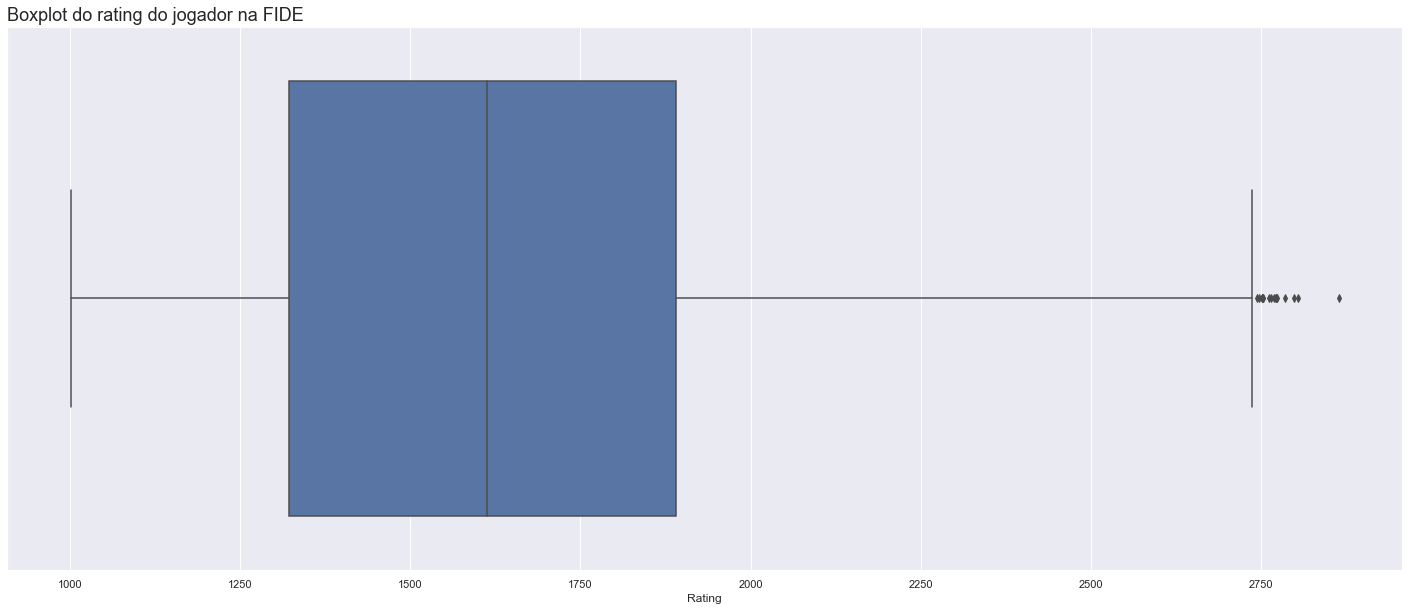

In [25]:
ax = sns.boxplot(data=data, x='FIDE')
ax.set_title('Boxplot do rating do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)

In [26]:
## Antes de mostrar o boxplot da coluna 'K-factor', notamos que ela está nomeada como ' K-factor', com um espaço antes do nome
## Vamos ajustar para facilitar na hora de chamar a coluna

data.rename(columns={' K-factor':'K-factor'}, inplace=True)

C:\Users\PC\AppData\Local\Temp/ipykernel_11528/3149043008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={' K-factor':'K-factor'}, inplace=True)


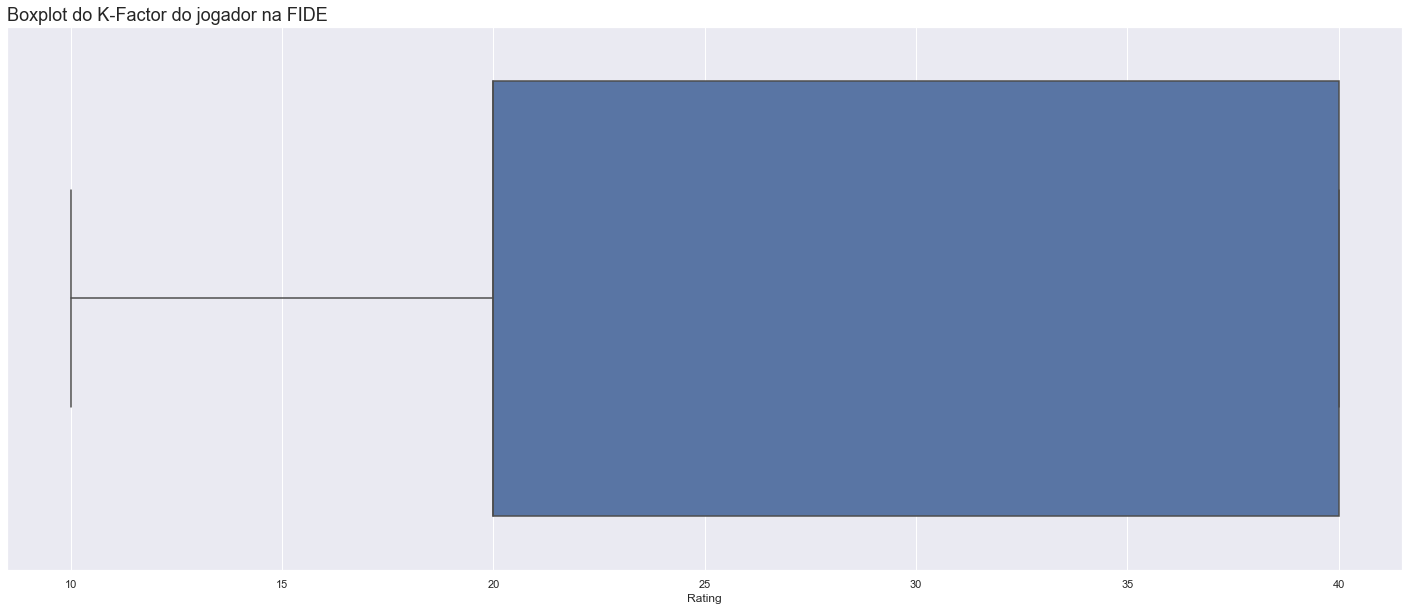

In [27]:
ax = sns.boxplot(data=data, x='K-factor')
ax.set_title('Boxplot do K-Factor do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)